# Assignment 2 Due on October 22 23:59 PM

## Student Name: Lafleur, Tristan (40245238)

In [1]:
import pandas
import numpy
import statsmodels.formula.api as smf
import seaborn.objects as so
import seaborn_objects_recipes as sor

## 1: Missing Values for US income data

### Question 1-1

Today, we will be using the ACS data we used during out first `pandas` exercise to examine the US income distribution, and how it varies by race. Note that because the US income distribution has a very small number of people with *extremely* high incomes, and the ACS is just a sample of Americans, the far right tail of the distribution will not be very well estimated. However, this data should suffice for helping to understand wealth inequality in the United States. 

To begin, load the ACS Data we used in our first pandas exercise. That [data can be found here](https://github.com/nickeubank/MIDS_Data/tree/master/US_AmericanCommunitySurvey). We'll be working with `US_ACS_2017_10pct_sample.dta`. 

In [2]:
# Write your code here, add another cell if you need to write markdown formate.
us_acs_dataset = pandas.read_stata("US_ACS_2017_10pct_sample.dta")
us_acs_dataset.head()

,year,datanum,serial,cbserial,numprec,subsamp,hhwt,hhtype,cluster,adjust,...,migcounty1,migmet131,vetdisab,diffrem,diffphys,diffmob,diffcare,diffsens,diffeye,diffhear
0,2017,1,177686,2.017001e+12,9,64,55,"female householder, no husband present",2.017002e+12,1.011189,...,0,not in identifiable area,n/a,n/a,n/a,n/a,n/a,no vision or hearing difficulty,no,no
1,2017,1,1200045,2.017001e+12,6,79,25,"male householder, no wife present",2.017012e+12,1.011189,...,0,not in identifiable area,n/a,no cognitive difficulty,no ambulatory difficulty,no independent living difficulty,no,no vision or hearing difficulty,no,no
2,2017,1,70831,2.017000e+12,1 person record,36,57,"male householder, living alone",2.017001e+12,1.011189,...,0,not in identifiable area,n/a,has cognitive difficulty,no ambulatory difficulty,no independent living difficulty,no,no vision or hearing difficulty,no,no
3,2017,1,557128,2.017001e+12,2,10,98,married-couple family household,2.017006e+12,1.011189,...,0,not in identifiable area,n/a,no cognitive difficulty,no ambulatory difficulty,no independent living difficulty,no,no vision or hearing difficulty,no,no
4,2017,1,614890,2.017001e+12,4,96,54,married-couple family household,2.017006e+12,1.011189,...,0,not in identifiable area,n/a,n/a,n/a,n/a,n/a,no vision or hearing difficulty,no,no


### Question 1-2

Let's begin by calculating the mean US incomes from this data (recall that income is stored in the `inctot` variable). Store the answer in `results` under the key `"ex2_avg_income"`.

In [3]:
# Write your code here, add another cell if you need to write markdown formate.
ex2_avg_income = us_acs_dataset.inctot.mean()
print(f"${ex2_avg_income:,.2f}")

$1,723,646.27


### Question 1-3

Hmmm... That doesn't look right. The average American is definitely not earning that much a year! Let's look at the values of `inctot` using `value_counts()`. Do you see a problem?

Now use `value_counts()` with the argument `normalize=True` to see proportions of the sample that report each value instead of the count of people in each category. What percentage of our sample has an income of 9,999,999? Store that proportion (between 0 and 1) as `"ex3_share_making_9999999"`. What percentage has an income of 0? Store that proportion as `"ex3_share_making_zero"`.

(Recall `.value_counts()` returns a Series, so you can pull values out with our usual pandas tools.)

In [4]:
# Write your code here, add another cell if you need to write markdown formate.
print(us_acs_dataset.inctot.value_counts())

print(us_acs_dataset.inctot.value_counts(normalize=True)[9999999])

ex3_share_making_9999999 = us_acs_dataset.inctot.value_counts(normalize=True)[9999999]

print(us_acs_dataset.inctot.value_counts(normalize=True)[0])

ex3_share_making_zero = us_acs_dataset.inctot.value_counts(normalize=True)[0]

inctot
9999999    53901
0          33679
30000       4778
50000       4414
40000       4413
           ...  
70520          1
76680          1
57760          1
200310         1
505400         1
Name: count, Length: 8471, dtype: int64
0.1689665333350052
0.10557547867738336


- There are special values of 9999999 being used which can affect the outcome of aggregations.
- The value of 9999999 covers abbout 16% og the whole data in `inctot`.
- The value of 0 covers abbout 10% og the whole data in `inctot`.

### Question 1-4

As we discussed before, the ACS uses a value of 9999999 to denote that income information is not available for someone. The problem with using this kind of "sentinel value" is that pandas doesn't understand that this is supposed to denote missing data, and so when it averages the variable, it doesn't know to ignore 9999999. 

To help out `pandas`, use the `replace` command to replace all values of 9999999 with `np.nan`. 

In [5]:
# Write your code here, add another cell if you need to write markdown formate.
us_acs_clean_income_dataset = us_acs_dataset.copy()
us_acs_clean_income_dataset["inctot"] = us_acs_clean_income_dataset["inctot"].replace(9999999, numpy.nan)
print(us_acs_clean_income_dataset.inctot.value_counts())

inctot
0.0         33679
30000.0      4778
50000.0      4414
40000.0      4413
20000.0      4067
            ...  
246600.0        1
90810.0         1
341380.0        1
15790.0         1
505400.0        1
Name: count, Length: 8470, dtype: int64


### Question 1-5

Now that we've properly labeled our missing data as `np.nan`, let's calculate the average US income once more. Store the answer in `results` under the key `"ex5_avg_income"`.

In [6]:
# Write your code here, add another cell if you need to write markdown formate.
ex5_avg_income = us_acs_clean_income_dataset.inctot.mean()
print(f"${ex5_avg_income:,.2f}")

$40,890.18


### Question 1-6

OK, now we've been able to get a reasonable average income number. As we can see, a major advantage of using `np.nan` is that `pandas` knows that `np.nan` observations should just be ignored when we are calculating means. 

But it's not enough to just get rid of the people who had `inctot` values of 9999999. We also need to know why those values were missing. Suppose, for example, that the value of 9999999 was used for anyone who made more than 100,000 dollars: if we just dropped those people, then our estimate of average income wouldn't mean much, would it?

So let's make sure we understand *why* data is missing for some people. If you recall from our last exercise, it seemed to be the case that most of the people who had incomes of 9999999 were children. Let's make sure that's true by looking at the distribution of the variable `age` for people for whom `inctot` is missing (i.e. subset the data to people with `inctot` missing, then look at the values of `age` with `value_counts()`).

Then do the opposite: look at the distribution of the `age` variable for people who whom `inctot` is *not* missing. 

Can you determine when 9999999 was being used? Is it ok we're excluding those people from our analysis?

Note: In this data, Python doesn't understand `age` is a number; it thinks it is a string because the original data has categories like "90 (90+ in 1980 and 1990)" and "less than 1 year old". So you can't just use `min()` or `max()`. We'll discuss converting string variables into numbers in a future class.

In [7]:
# Write your code here, add another cell if you need to write markdown formate.
income_set = us_acs_dataset[["age", "inctot"]]
income_sentinel_set = income_set[income_set.inctot == 9999999]
print(income_sentinel_set.age.value_counts())

income_valid_set = income_set[income_set.inctot != 9999999]
print(income_valid_set.age.value_counts())


age
10    3997
9     3977
14    3847
12    3845
13    3800
      ... 
39       0
38       0
37       0
36       0
96       0
Name: count, Length: 97, dtype: int64
age
60                      4950
54                      4821
59                      4776
56                      4776
58                      4734
                        ... 
5                          0
4                          0
3                          0
2                          0
less than 1 year old       0
Name: count, Length: 97, dtype: int64


- From the filtering shown above, it seems that the sentinel value was in fact used for people not in the work force yet, i.e. children. Therefore, it seems reasonable to exlude them from the mean value.

### Question 1-7

Great, so now we know why those people had missing data, and we're ok with excluding them. 

But as we previously noted, there are also a lot of observations of zero income in our data, and it's not clear that we want everyone with a zero-income *should* be included in this average, since those may be people who are retired, or in school. 

Let's limit our attention to people who are currently working by subsetting to only employed respondents. We can do this using `empstat`. Remember you can use `value_counts()` to see what values of `empstat` are in the data!

In [8]:
# Write your code here, add another cell if you need to write markdown formate.
print(us_acs_dataset["empstat"].value_counts())

employed_residents = us_acs_dataset[us_acs_dataset.empstat.__eq__("employed")]
print(employed_residents["empstat"].value_counts())

empstat
employed              148758
not in labor force    104676
n/a                    57843
unemployed              7727
Name: count, dtype: int64
empstat
employed              148758
n/a                        0
unemployed                 0
not in labor force         0
Name: count, dtype: int64


### Question 1-8

Now let's estimate the racial income gap in the United States. What is the average salary for employed Black Americans, and what is the average salary for employed White Americans? In percentage terms, how much more does the average White American make than the average Black American?

**Note:** these values are not quite accurate estimates. As we'll discuss in later lessons, to get completely accurate estimates from the ACS we have to take into account how people were selected to be interviewed. But you get pretty good estimates in most cases even without weights—your estimate of the racial wage gap without weights is within 5\% of the corrected value. 

**Note:** This is actually an underestimate of the wage gap. The US Census treats Hispanic respondents as a sub-category of "White." While all ethnic distinctions are socially constructed, and so on some level these distinctions are all deeply problematic, this coding is inconsistent with what most Americans think of when they hear the term "White," a term *most* Americans think of as a category that is mutually exclusive of being Hispanic or Latino (categories which are also usually conflated in American popular discussion). With that in mind, most researchers working with US Census data split "White" into "White, Hispanic" and "White, Non-Hispanic" using `race` *and* `hispan`. But for the moment, just identify "White" respondents using the value in `race`.

Store your results in `results` under the keys `"ex8_avg_income_black"`, `"ex8_avg_income_white"`, and the percentage difference as `ex8_racial_difference`. Please note the wording above when calculating the percentage difference to ensure you get the reference category correct, and interpret your result as well.

In [9]:
# Write your code here, add another cell if you need to write markdown formate.
result = {}

black_residents = employed_residents[employed_residents.race.__eq__("black/african american/negro")]
ex8_avg_income_black = black_residents.inctot.mean()
print(f"${ex8_avg_income_black:,.2f}")
result["ex8_avg_income_black"] = ex8_avg_income_black

white_residents = employed_residents[employed_residents.race.__eq__("white")]
ex8_avg_income_white = white_residents.inctot.mean()
print(f"${ex8_avg_income_white:,.2f}")
result["ex8_avg_income_white"] = ex8_avg_income_white

ex8_racial_difference = ex8_avg_income_white / ex8_avg_income_black
print(f"{ex8_racial_difference * 100:,.2f}%")
result["ex8_racial_difference"] = ex8_racial_difference

print(result)

$41,747.95
$60,473.15
144.85%
{'ex8_avg_income_black': 41747.949905123336, 'ex8_avg_income_white': 60473.15372747098, 'ex8_racial_difference': 1.4485299006275196}


- From the calculations, it would seem that the people falling under the category of `white` are making about 145% of what the people falling under the category of `black/african american/negro` are making.

### Question 1-9


As noted above, these estimates are not actually *quite* correct because we aren't taking into account the fact that when the US Census decided who to survey, not all Americans had the same likelihood of being asked. The US American Community Survey is an example of a *weighted* survey (essentially, people from smaller subpopulations have a higher likelihood of being included to ensure enough individuals in the final survey to constitute a representative sample that can be used statistically). 

To calculate a weighted average that takes into account these survey weights (in other words, a more accurate estimate of US incomes), you need to use the following formula:

$$weighted\_mean\_of\_x = \frac{\sum_i x_i * weight_i}{\sum_i weight_i}$$

(As you can see, when $weight_i$ is constant for all observations, this just simplifies to our normal formula for mean values. It is only when weights vary across individuals that weights must be explicitly addressed).

In this data, weights are stored in the variable `perwt`, which is the number of people for which each observation is a stand-in (the inverse of that observation's sampling probability). 

Using the formula, re-calculate the *weighted* average income for both populations and store them as `ex9_avg_income_white` and `ex9_avg_income_black`.


In [10]:
# Write your code here, add another cell if you need to write markdown formate.
def weighted_mean_of_x(_x, _weight):
    return (_x * _weight).sum() / _weight.sum()


ex9_ave_income_white = weighted_mean_of_x(white_residents.inctot.to_numpy(), white_residents.perwt.to_numpy())
print(f"${ex9_ave_income_white:,.2f}")

ex9_ave_income_black = weighted_mean_of_x(black_residents.inctot.to_numpy(), black_residents.perwt.to_numpy())
print(f"${ex9_ave_income_black:,.2f}")

$115.90
$514.68


### Question 1-10

Now calculate the weighted average income gap between *non-Hispanic* White Americans and Black Americans. What percentage more do employed White non-Hispanic Americans earn than employed Black Americans? Store as `"ex10_wage_gap"`.

In [11]:
# Write your code here, add another cell if you need to write markdown formate.
non_hispanic_white_residents = white_residents[white_residents.hispan.__eq__("not hispanic")]
print(non_hispanic_white_residents.hispan.value_counts())

non_hispanic_weighted_income_ave = weighted_mean_of_x(non_hispanic_white_residents.inctot.to_numpy(), non_hispanic_white_residents.perwt.to_numpy())
print(f"${non_hispanic_weighted_income_ave:,.2f}")

ex10_wage_gap = non_hispanic_weighted_income_ave / ex9_ave_income_black
print(f"{ex10_wage_gap * 100:.2f}%")

hispan
not hispanic    102683
mexican              0
puerto rican         0
cuban                0
other                0
Name: count, dtype: int64
$12.36
2.40%


### Question 1-11

Is that greater or less than the difference you found in Exercise 8? Why do you think that's the case?

- The gap is far less than previously shown in exercise 8. This may be due to the weights contributing a greater importance.

## Question 2 Wealth and Democracy: Plotting

**Remember that we always want to make good plots, we will try to make perfect plots.**

In these questions, we will be working with country-year level data from the World Development Indicators (published by the World Bank) to understand the relationship between wealth and democratic institutions.

This WDI data includes both countries' GDP per capita (a measure of wealth) and [Polity IV scores](https://en.wikipedia.org/wiki/Polity_data_series) (a measure of how democratic a country is -- countries with higher scores are liberal democracies countries with low scores are autocratic). 

Note by "liberal," we mean [reflecting the values of traditional liberalism](https://en.wikipedia.org/wiki/Liberalism) with a small-`l`, not Liberal in the sense of being associated with the US Democratic party.

In [12]:
# Write your code here, add another cell if you need to write markdown formate.
wdi = pandas.read_csv("wdi_data.csv")
print(wdi.head())

   Unnamed: 0    country      region  gdppcap08  polityIV
0           0    Albania  C&E Europe       7715      17.8
1           1    Algeria      Africa       8033      10.0
2           2     Angola      Africa       5899       8.0
3           3  Argentina  S. America      14333      18.0
4           4    Armenia  C&E Europe       6070      15.0


### Question 2-1


Let's begin analyzing this data by estimating a simple linear model ("ordinary least squares") of the relationship between democracy scores (`polityIV`) and GDP per capita (`gdppcap08`). Polity Scores are the outcome we care about, so make it the dependent variable in your model. We will do so using the `statsmodel` package, which we'll discuss in detail later is this course. For the moment, just use this code:

```python
import statsmodels.formula.api as smf
results = smf.ols('polityIV ~ gdppcap08',
                   data=wdi).fit()
print(results.summary())
```

In [13]:
# Write your code here, add another cell if you need to write markdown formate.
results = smf.ols('polityIV ~ gdppcap08', data=wdi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.981
Date:                Tue, 15 Oct 2024   Prob (F-statistic):            0.00915
Time:                        10:59:11   Log-Likelihood:                -475.14
No. Observations:                 145   AIC:                             954.3
Df Residuals:                     143   BIC:                             960.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1354      0.721     16.841      0.0

### Question 2-2

Based on the results of this analysis, what would you conclude about the relationship between `gdppcap08` and `polityIV`? 

Write down your conclusions. 

- Overall it seems that attempting to determine a countries democratic standing based on gdp provides a very weak correlation. This can be seen by looking at the value returned in the `R-Squared` parameter. Since it is very far from 1, it indicates a weak correlation.
- The `F-Statistic` also provides a similar conclusion, the low propability means that the proposed opposition to the null hypothesis of no correlation existing is very unlikely.

### Question 2-3

Now let's plot the relationship you just estimated statistically. First, use `seaborn.objects` to create a scatter plot of `polityIV` and `gdppcap08`. Include a title and label your axes (with formatted words, not variable names).

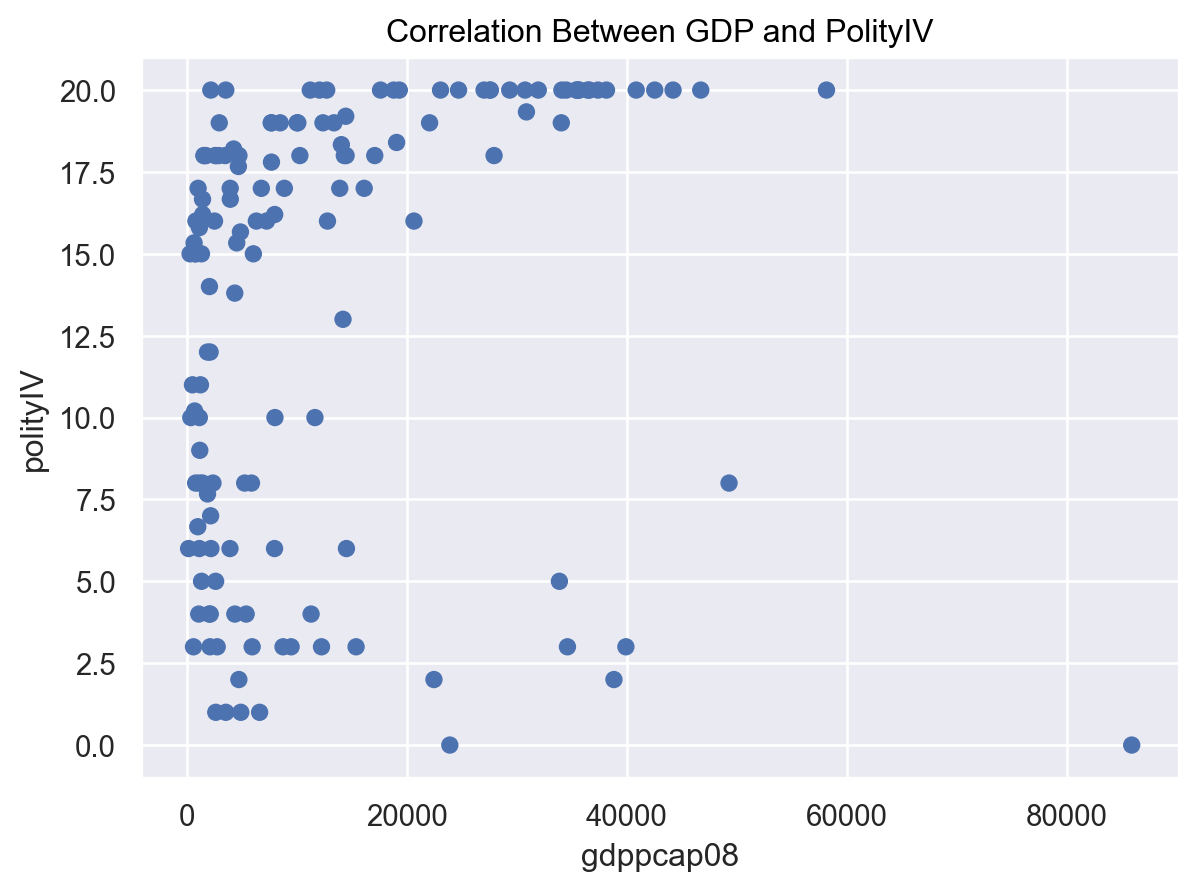

In [14]:
# Write your code here, add another cell if you need to write markdown formate.
plot = (so.Plot(wdi, x="gdppcap08", y="polityIV").add(so.Dot()))
plot.label(title="Correlation Between GDP and PolityIV")

### Question 2-4

Now overlay a linear regression (*not* a higher order polynomial, just linear) fit to the scatter plot.

Note: linear regression is *not* symmetric — regressing Polity IV on GDP per Capita does not give the same result as regressing GDP per Capita on Polity IV. That's because linear regression is designed to minimize the sum of squared errors between predicted values of the y-variable and the true values of the y-variable, so the y-variable is, in a sense, privileged. 

Given that, for consistency be sure you make your plot reflect the regression you ran above.

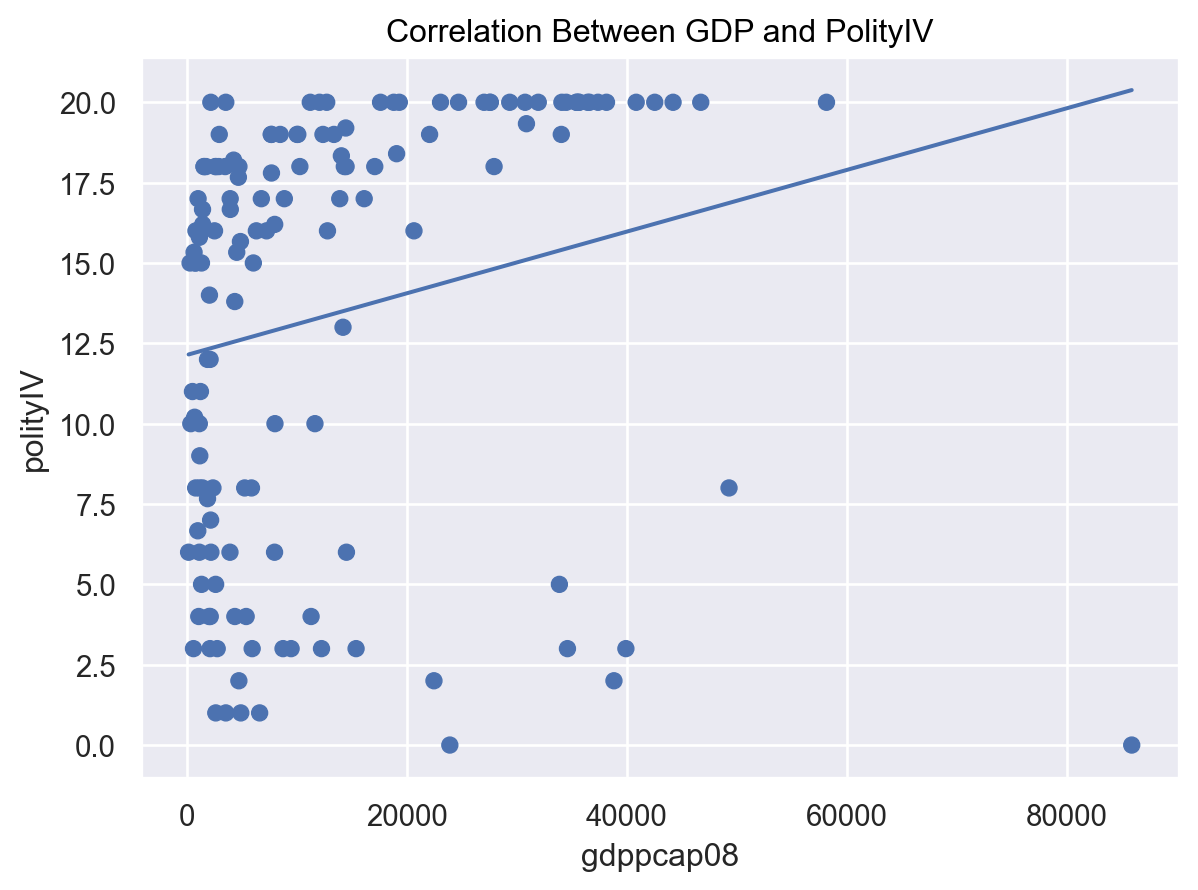

In [15]:
# Write your code here, add another cell if you need to write markdown formate.
plot = (so.Plot(wdi, x="gdppcap08", y="polityIV").add(so.Dot()).add(so.Line(), so.PolyFit(order=1)))
plot.label(title="Correlation Between GDP and PolityIV")

### Question 2-5

Does it seem like the linear model you estimated fits the data well?

- From the plot shown above it can be seen that the model does not fit the data very well, which matchews the conclusion drawn from the statistical model done earlier.

### Question 2-6

Linear models impose a very strict functional form on the model they use: they try to draw a straight line through the data, no matter what. 

Can you think of a (mathematical) transformation for your data that would make the data a little more sane?

Apply the transformation.

- A possible way to transform the data would be to apply a log scale to the GDP.

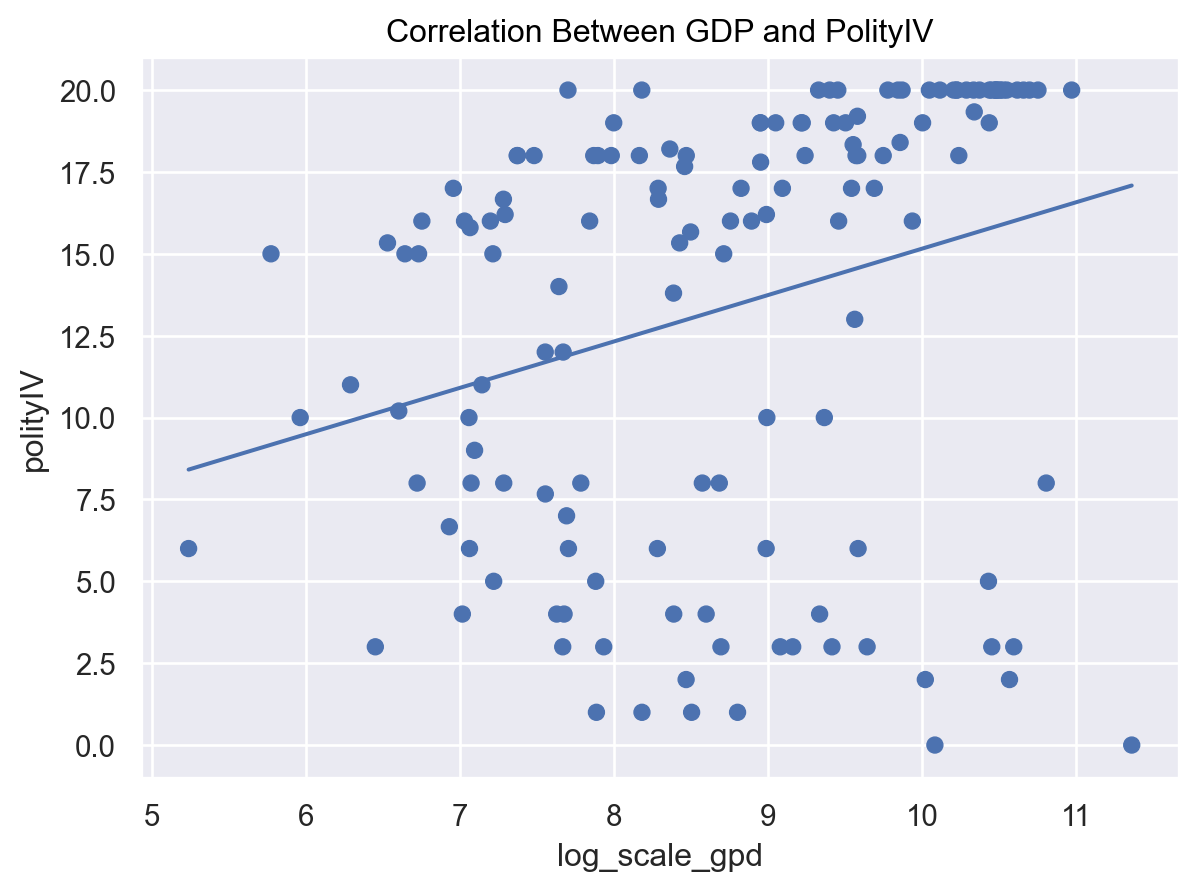

In [16]:
# Write your code here, add another cell if you need to write markdown formate.
wdi["log_scale_gpd"] = numpy.log(wdi["gdppcap08"])

plot = (so.Plot(wdi, x="log_scale_gpd", y="polityIV").add(so.Dot()).add(so.Line(), so.PolyFit(order=1)))
plot.label(title="Correlation Between GDP and PolityIV")

### Question 2-7

Once you've applied that transformation, let's re-fit our model. 

Has you sense of the relationship changed at all?

In [17]:
# Write your code here, add another cell if you need to write markdown formate.
results = smf.ols('polityIV ~ log_scale_gpd', data=wdi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     12.95
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           0.000441
Time:                        10:59:12   Log-Likelihood:                -472.31
No. Observations:                 145   AIC:                             948.6
Df Residuals:                     143   BIC:                             954.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9951      3.490      0.285

- The results showcase a slight improvement by utilizing a logarithmic model however the overall relationship is still weak.

### Question 2-8

When unsure of the most appropriate functional form for a model, it can be useful to fit a *non-parametric* model — one that does not impose a functional form as strictly. 

Fit a lowess regression with confidence intervals using the `seaborn_objects_recipes` package.

`frac` is a keyword that manages how much lowess will smooth it's estimates across the data — higher values will be more smoothed, lower values with fit the data much tighter. Play with the values till you find something you think feels informative.

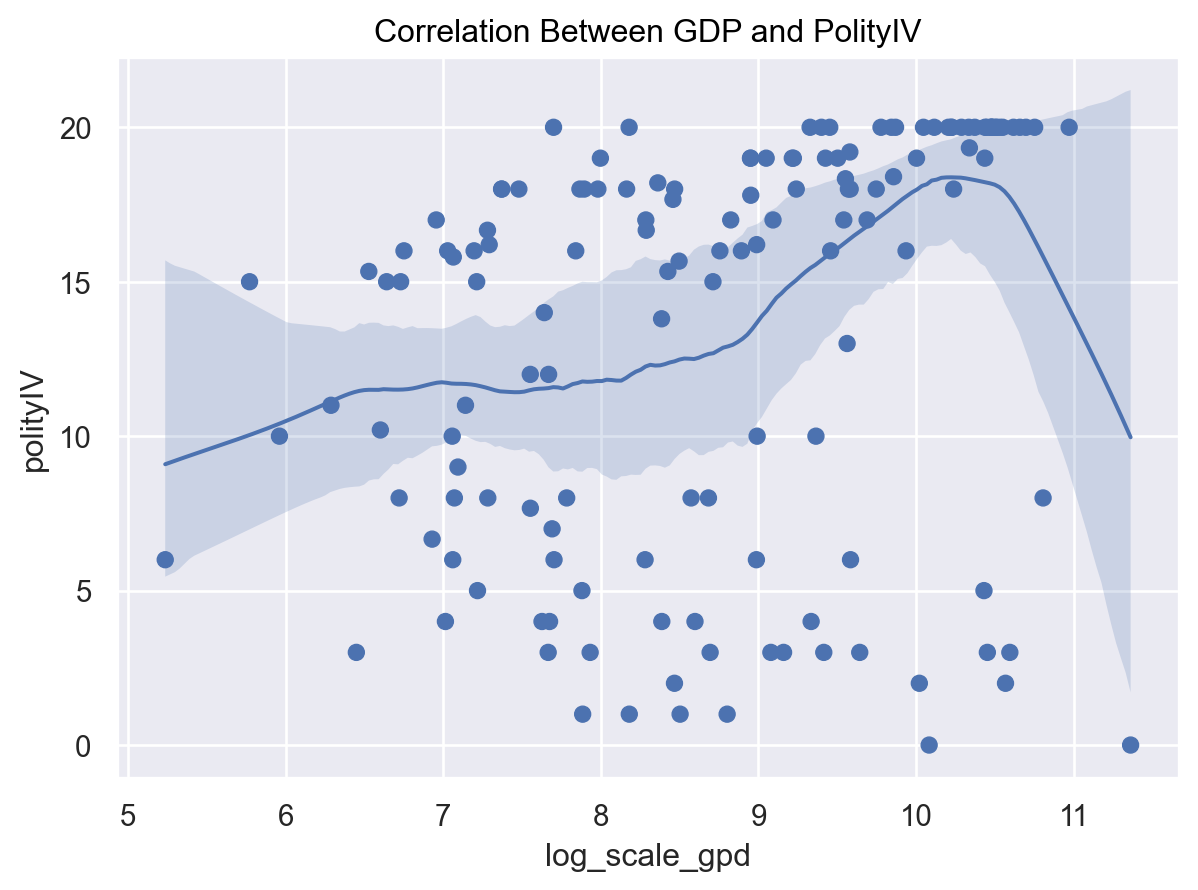

In [18]:
# Write your code here, add another cell if you need to write markdown formate.
plot = (
    so.Plot(wdi, x="log_scale_gpd", y="polityIV").add(so.Dot())
                                                    .add(so.Line(), lowess := sor.Lowess(frac=0.33, gridsize=200, num_bootstrap=200, alpha=0.95))
                                                    .add(so.Band(), lowess)
)
plot.label(title="Correlation Between GDP and PolityIV")

### Question 2-9

This does seem to fit the data better, but there seem to be quite a few outliers in the bottom right. Who is that? Add text labels to the points on your graph with country names. 

Make sure the size of your text labels leaves them legible. There are enough points you won't be able to perfectly see all labels, but do your best.

You can also add `so.Jitter()` to "jitter" the location of labels (move them randomly so when several points share an exact coordinate, they'll be shifted a little).

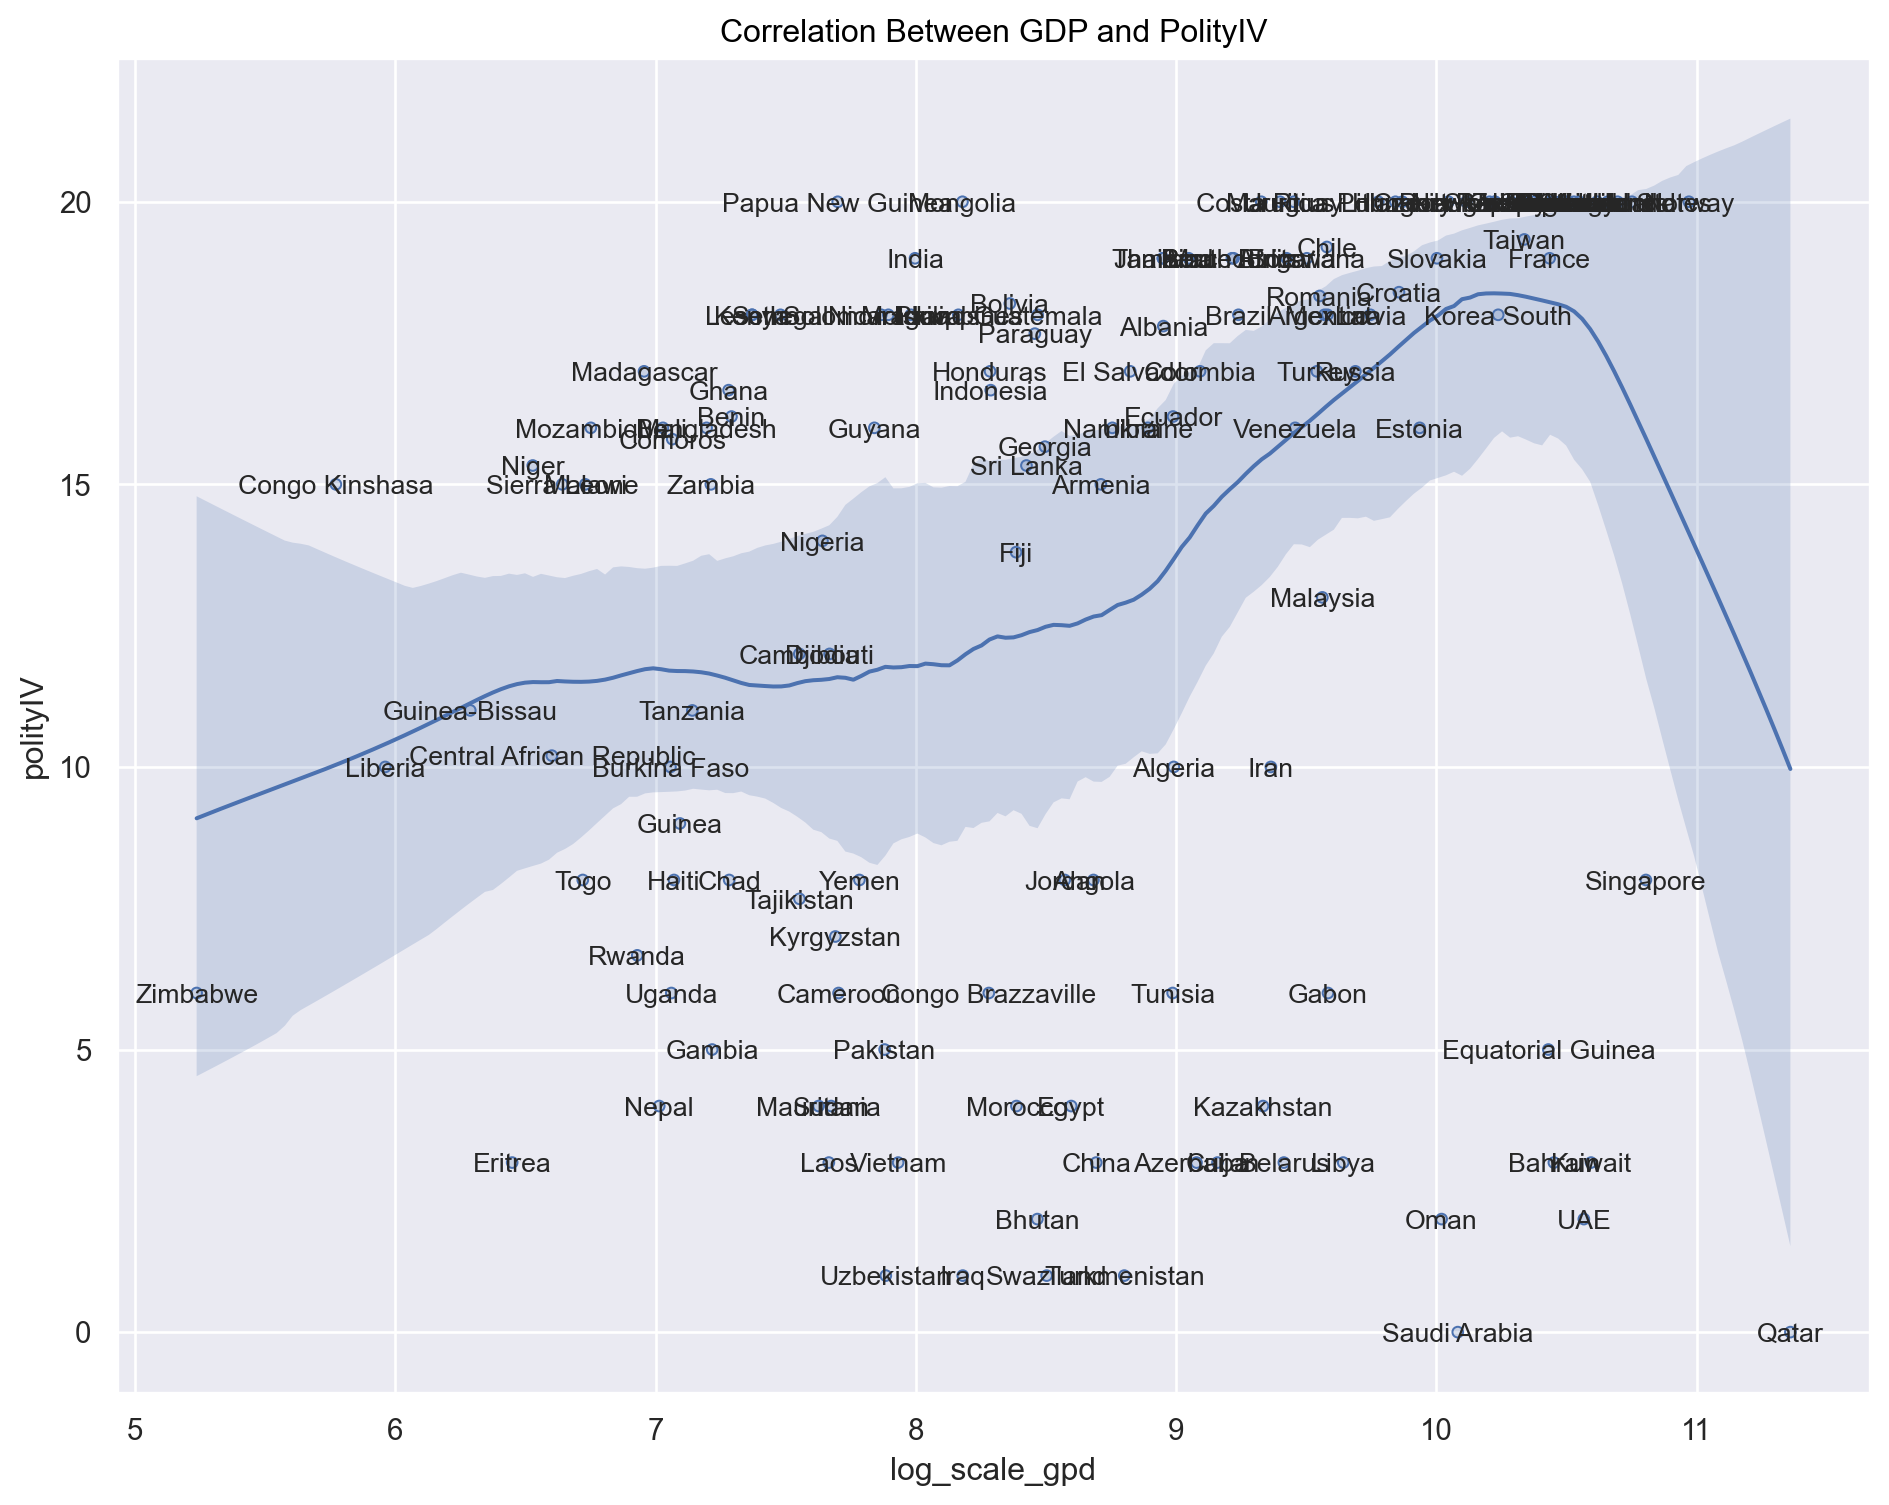

In [19]:
# Write your code here, add another cell if you need to write markdown formate.
plot = (
    so.Plot(wdi, x="log_scale_gpd", y="polityIV").layout(size=(10,8))
                                                    .add(so.Dots())
                                                    .add(so.Line(), lowess := sor.Lowess(frac=0.33, gridsize=200, num_bootstrap=200, alpha=0.95))
                                                    .add(so.Band(), lowess)
                                                    .add(so.Text(fontsize=10), so.Jitter(), text="country")
)
plot.label(title="Correlation Between GDP and PolityIV")

### Question 2-10

Interesting. It seems that there's are a lot of rich, undemocratic countries that all have something in common: they're oil-rich, small, Middle Eastern countries.

Let's see what happens if we exclude the ten countries with the highest per-capita oil production from our data: Qatar, Kuwait, Equatorial Guinea, United Arab Emirates, Norway, Saudi Arabia, Libya, Oman, Gabon, and Angola. (Note this was in 2007, and excludes very small countries!) 

What does the relationship between Polity and GDP per capita look like for **non**-natural resource producers?

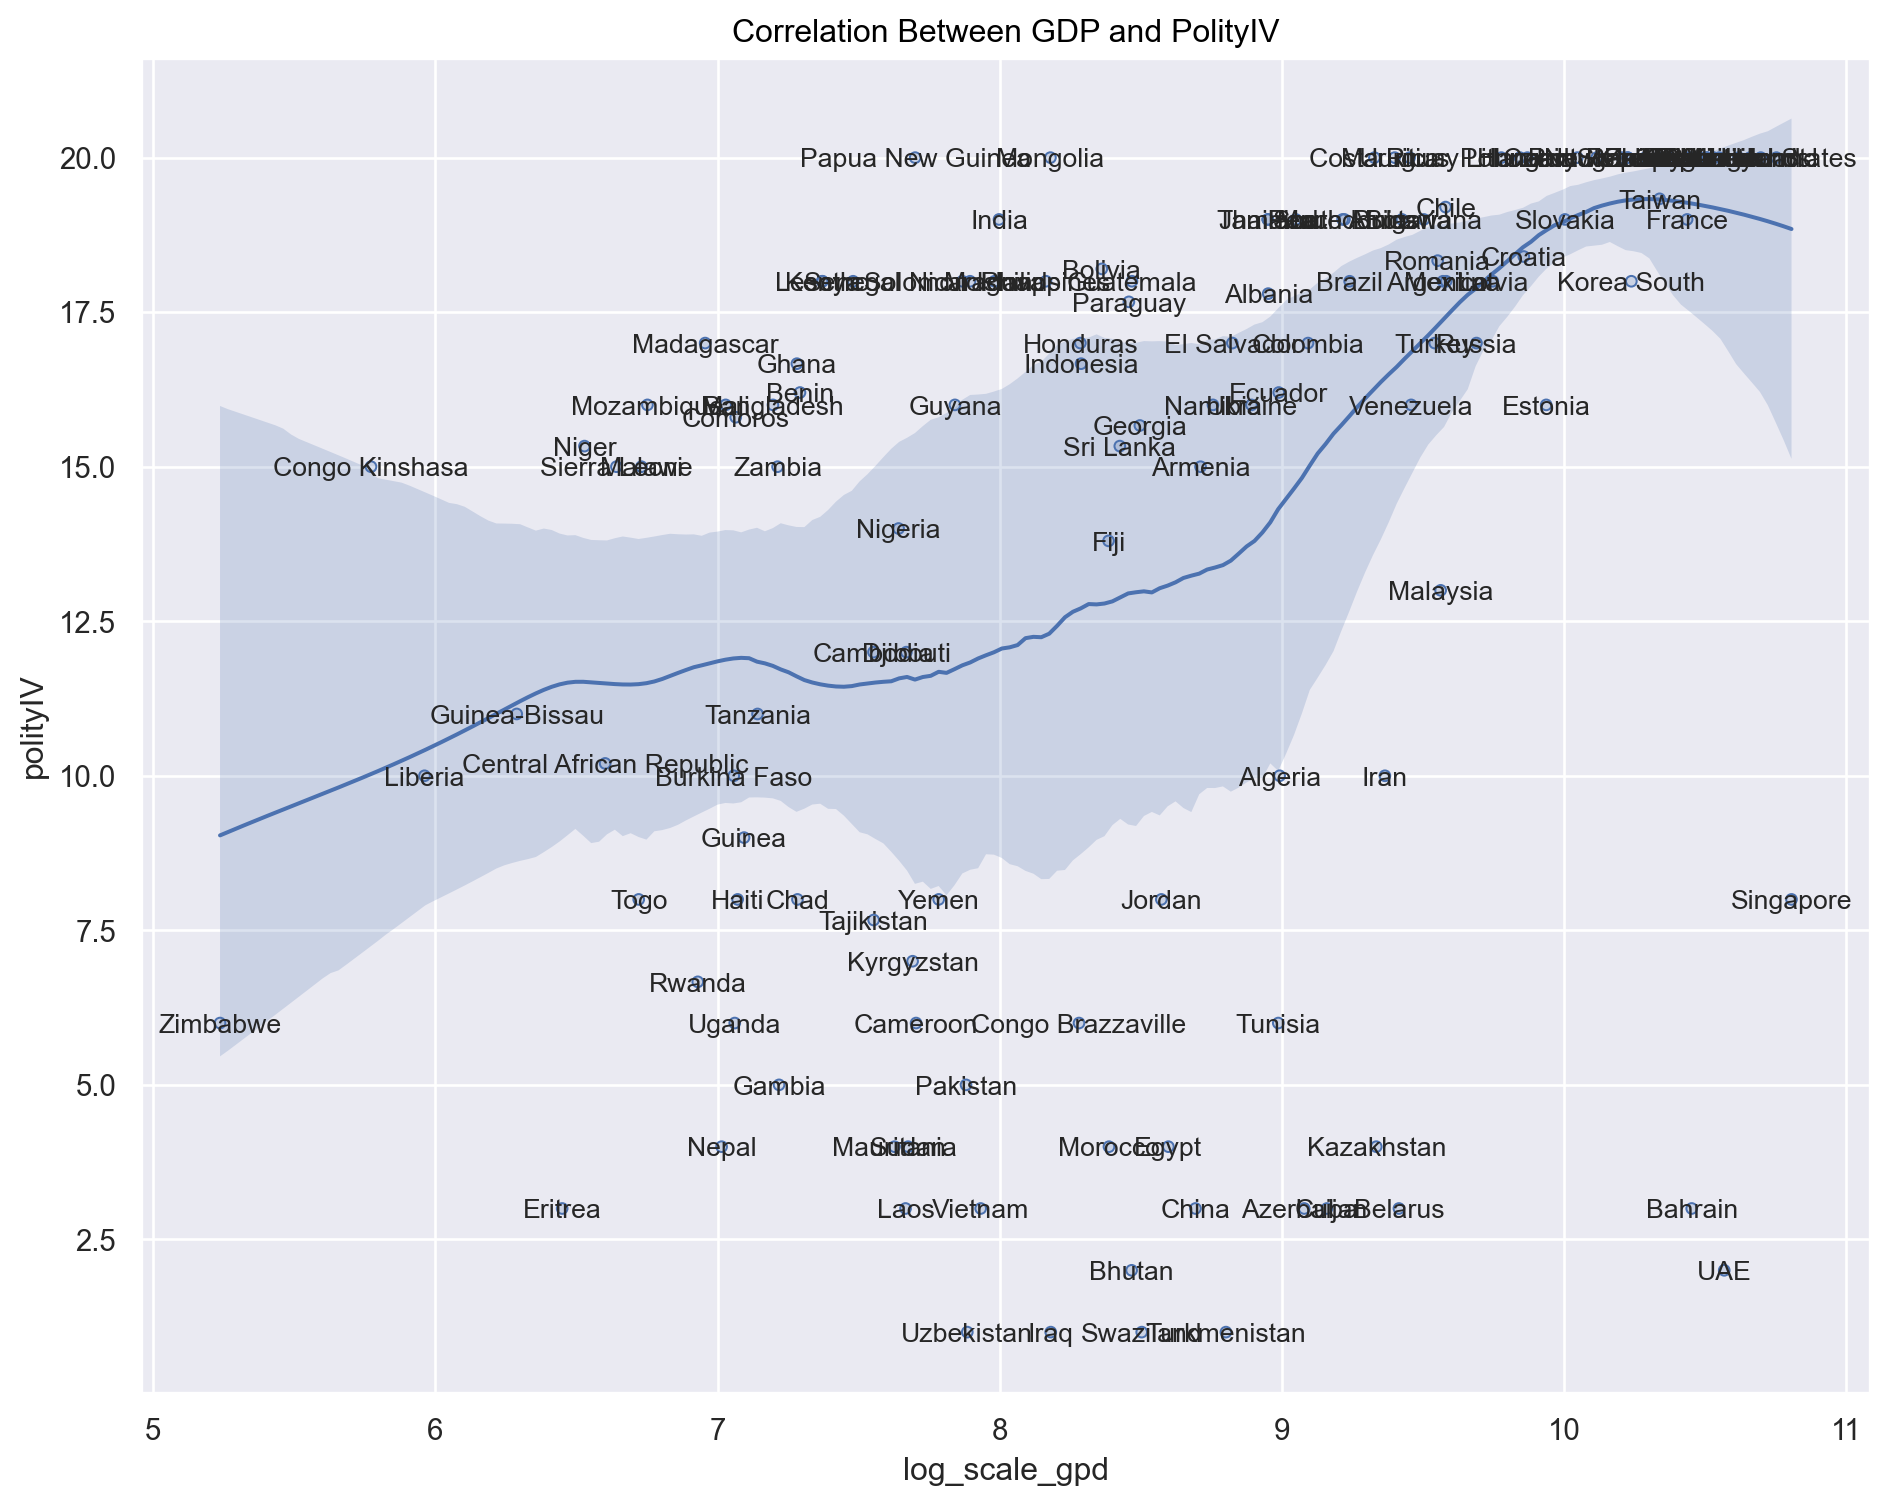

In [20]:
# Write your code here, add another cell if you need to write markdown formate.
wdi_no_oil_countries = wdi[~wdi.country.isin(["Qatar", "Kuwait", "Equatorial Guinea", "United Arab Emirates", "Norway", "Saudi Arabia", "Libya", "Oman", "Gabon", "Angola"])]

plot = (
    so.Plot(wdi_no_oil_countries, x="log_scale_gpd", y="polityIV").layout(size=(10,8))
                                                    .add(so.Dots())
                                                    .add(so.Line(), lowess := sor.Lowess(frac=0.33, gridsize=200, num_bootstrap=200, alpha=0.95))
                                                    .add(so.Band(), lowess)
                                                    .add(so.Text(fontsize=10), so.Jitter(), text="country")
)
plot.label(title="Correlation Between GDP and PolityIV")

### Question 2-11

Let's make sure that you accurately identified all 10 of the oil producers. Write a line of code to count up how many big producers you have identified. If you do not get 10, can you figure out what you did wrong?

In [21]:
# Write your code here, add another cell if you need to write markdown formate.
wdi_oil_countries = wdi[wdi.country.isin(["Qatar", "Kuwait", "Equatorial Guinea", "United Arab Emirates", "Norway", "Saudi Arabia", "Libya", "Oman", "Gabon", "Angola"])]
print(wdi_oil_countries)
print(len(wdi_oil_countries))

print(len(wdi[wdi.country.__eq__("United Arab Emirates")]))

     Unnamed: 0            country       region  gdppcap08  polityIV  \
2             2             Angola       Africa       5899       8.0   
39           39  Equatorial Guinea       Africa      33873       5.0   
45           45              Gabon       Africa      14527       6.0   
71           71             Kuwait  Middle East      39914       3.0   
77           77              Libya  Middle East      15402       3.0   
98           98             Norway  Scandinavia      58138      20.0   
99           99               Oman  Middle East      22478       2.0   
107         107              Qatar  Middle East      85868       0.0   
111         111       Saudi Arabia  Middle East      23920       0.0   

     log_scale_gpd  
2         8.682538  
39       10.430374  
45        9.583764  
71       10.594482  
77        9.642253  
98       10.970575  
99       10.020292  
107      11.360567  
111      10.082470  
9
0


- The error was that United Arab Emirates was abbreviated as UAE in the dataset.

In [22]:
print(len(wdi[wdi.country.__eq__("UAE")]))

1


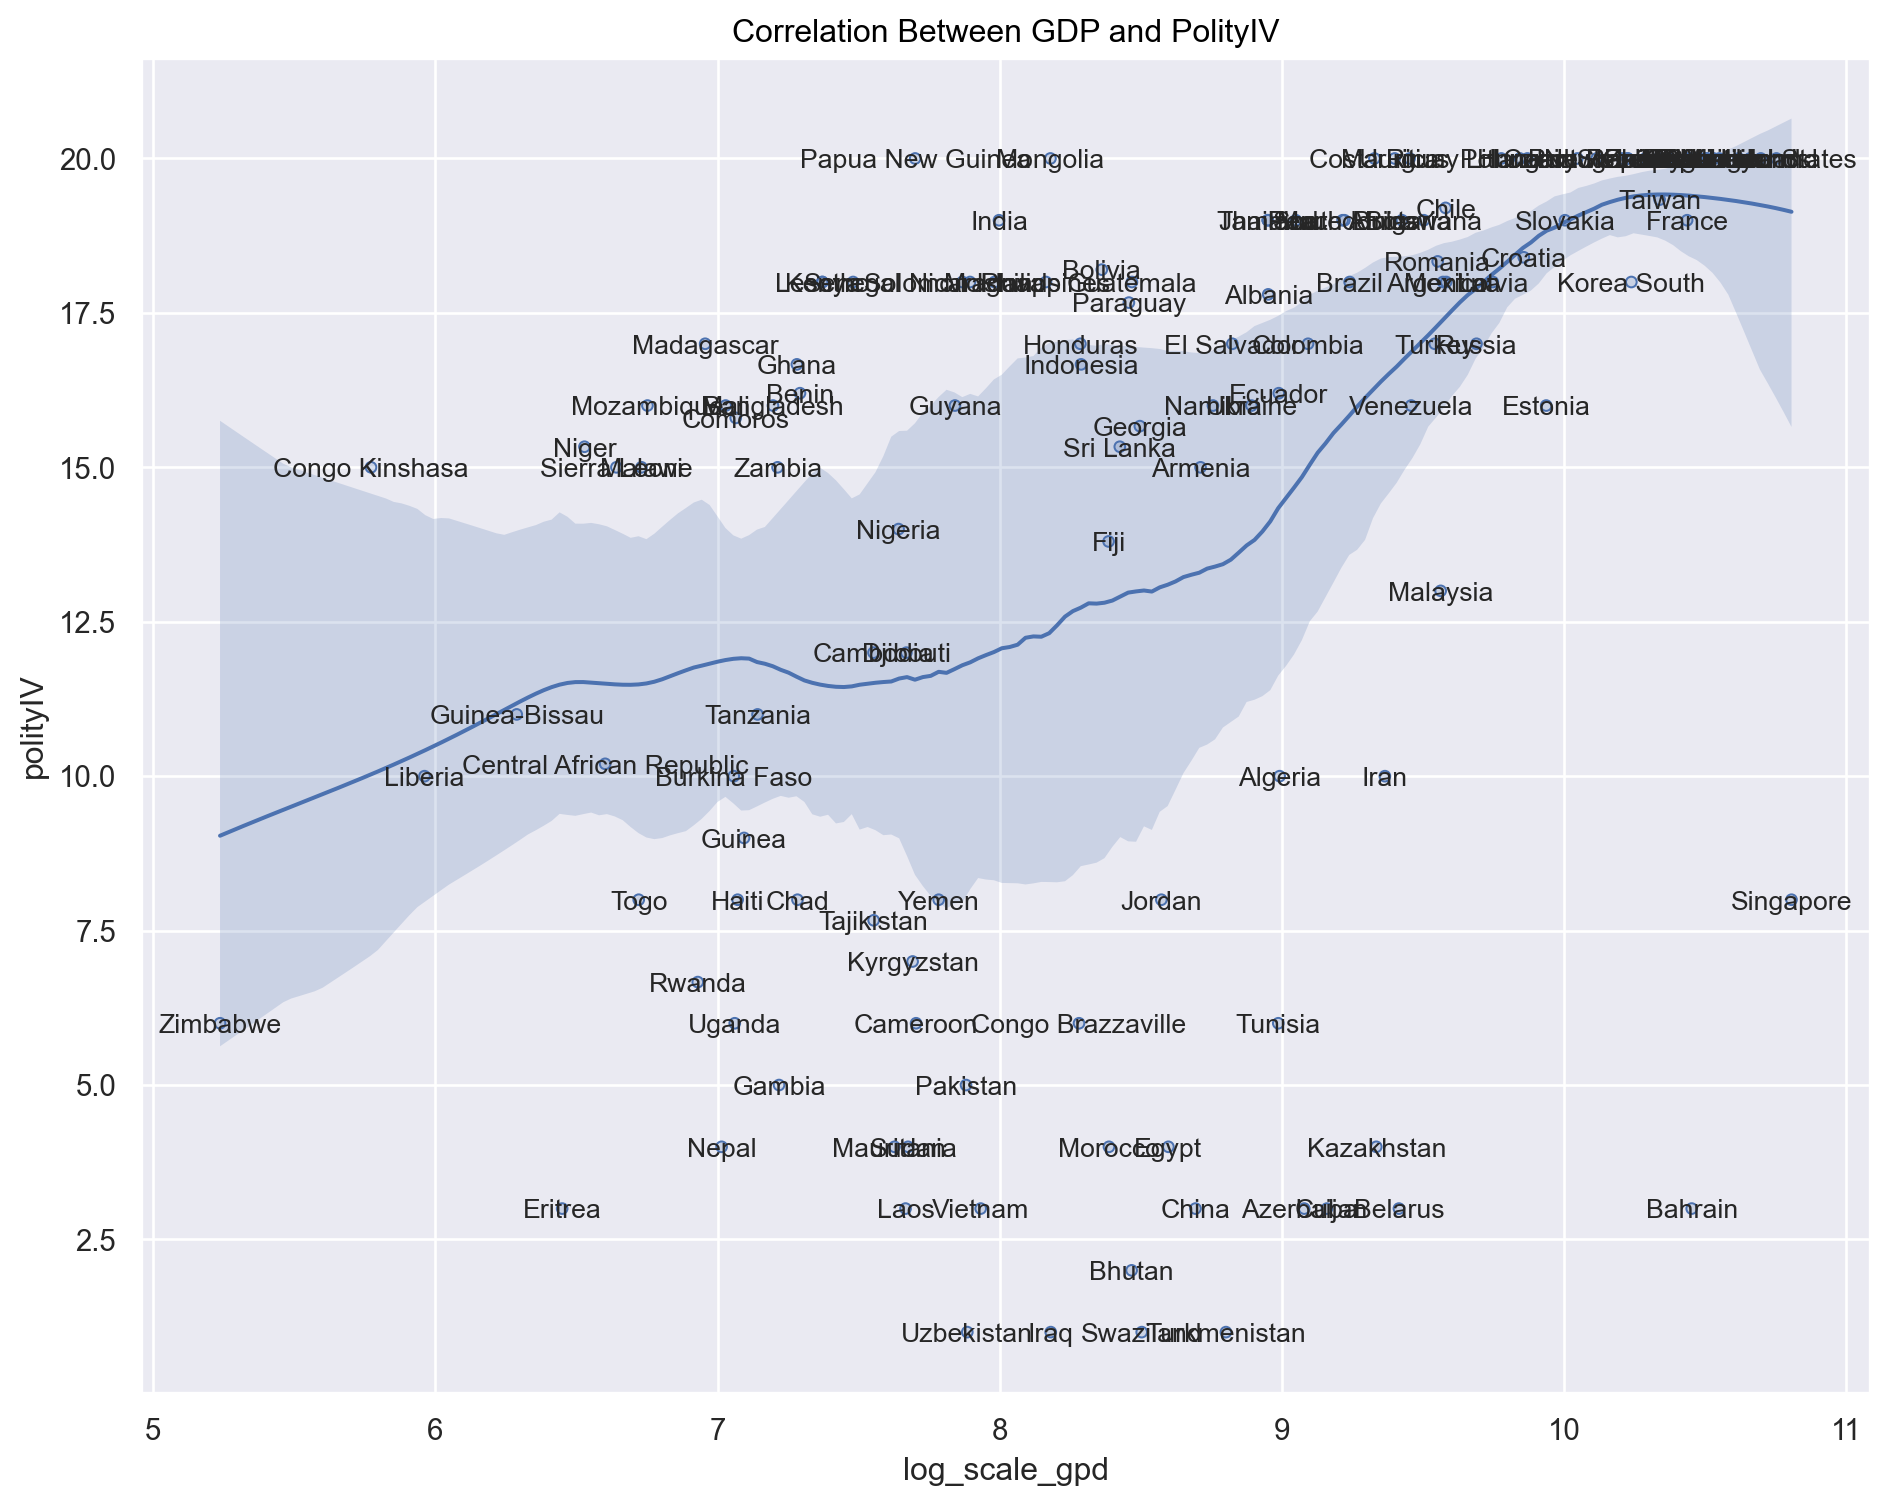

In [23]:
wdi_no_oil_countries = wdi[~wdi.country.isin(["Qatar", "Kuwait", "Equatorial Guinea", "UAE", "Norway", "Saudi Arabia", "Libya", "Oman", "Gabon", "Angola"])]

plot = (
    so.Plot(wdi_no_oil_countries, x="log_scale_gpd", y="polityIV").layout(size=(10,8))
                                                    .add(so.Dots())
                                                    .add(so.Line(), lowess := sor.Lowess(frac=0.33, gridsize=200, num_bootstrap=200, alpha=0.95))
                                                    .add(so.Band(), lowess)
                                                    .add(so.Text(fontsize=10), so.Jitter(), text="country")
)
plot.label(title="Correlation Between GDP and PolityIV")

### Question 2-12

How does the relationship between GDP per capita and Polity look for the oil producers we dropped above?

(Note you can't add a confidence interval given there are only 10 observations here, so drop the CIs)

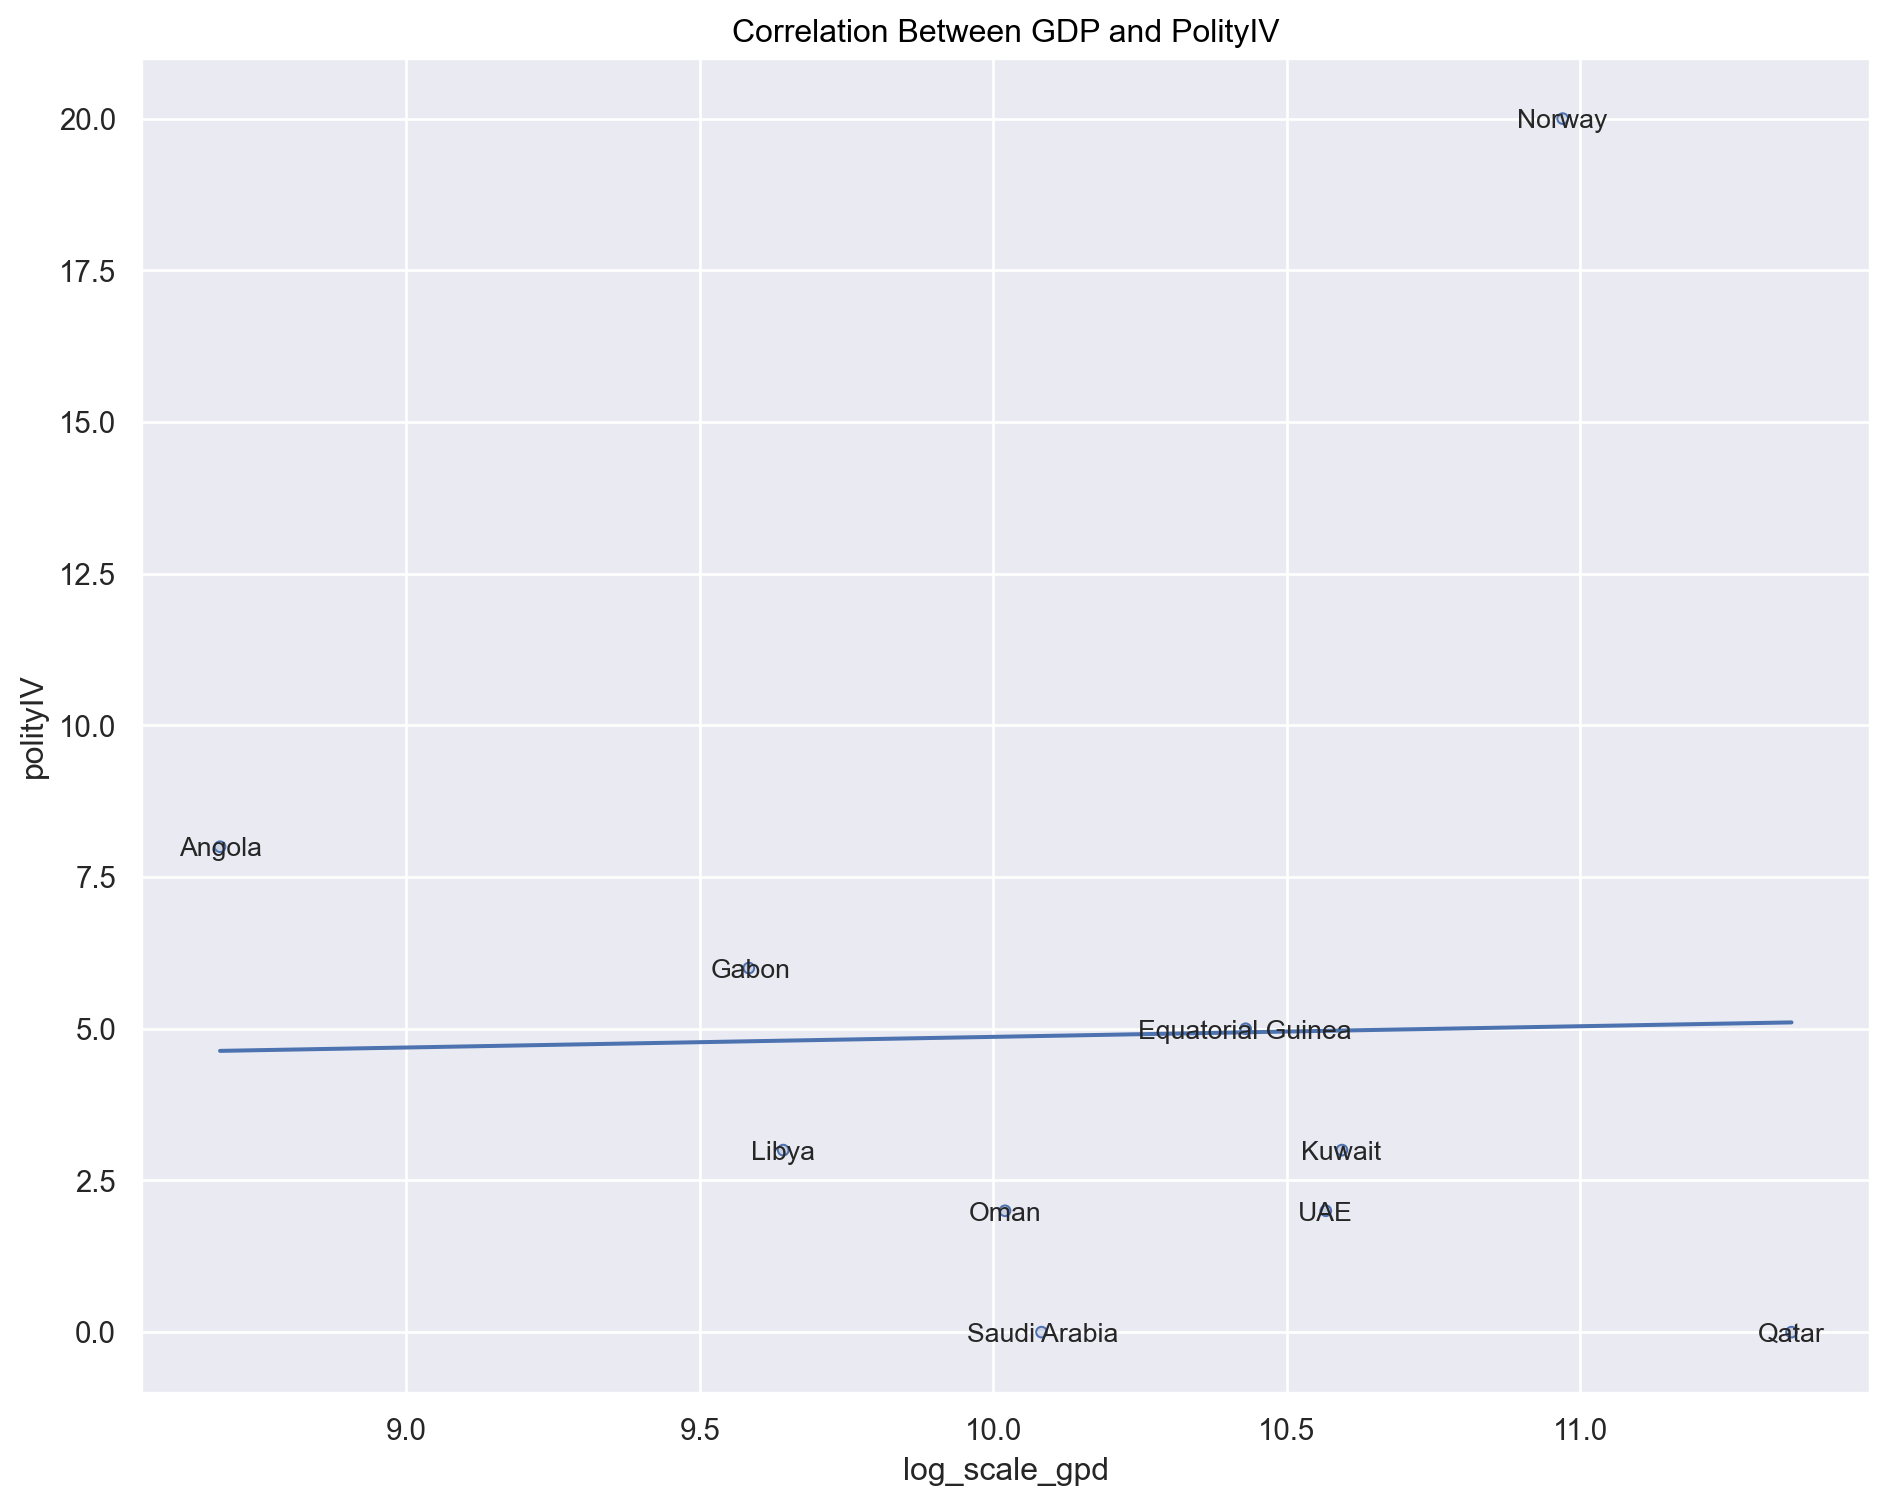

In [24]:
# Write your code here, add another cell if you need to write markdown formate.
wdi_oil_countries = wdi[wdi.country.isin(["Qatar", "Kuwait", "Equatorial Guinea", "UAE", "Norway", "Saudi Arabia", "Libya", "Oman", "Gabon", "Angola"])]

plot = (
    so.Plot(wdi_oil_countries, x="log_scale_gpd", y="polityIV").layout(size=(10,8))
                                                    .add(so.Dots())
                                                    .add(so.Line(), so.PolyFit(order=1))
                                                    .add(so.Text(fontsize=10), so.Jitter(), text="country")
)
plot.label(title="Correlation Between GDP and PolityIV")

### Question 2-13

Look back to your answer for Exercise 2. Do you still believe the result of your linear model? What did you learn from plotting. 

In [25]:
# Write your code here, add another cell if you need to write markdown formate.
results = smf.ols('polityIV ~ gdppcap08', data=wdi_oil_countries).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.119
Method:                 Least Squares   F-statistic:                   0.04567
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.836
Time:                        10:59:23   Log-Likelihood:                -31.345
No. Observations:                  10   AIC:                             66.69
Df Residuals:                       8   BIC:                             67.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2685      3.549      1.203      0.2

c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


- By plotting the oil rich countries it can be seen that now the linear model works as a decent predictor between polityIV and GDP barring the inclusion of Norway. Therefore, we can now draw a conclusion that there is a proper coreelation between GDP and PolityIV for oil-rich countries in that they tend to score very low.

### Question 2-14

Finally, let's make a plot that color codes countries by whether they are big oil producers. Include separate linear regression fits for both groups.

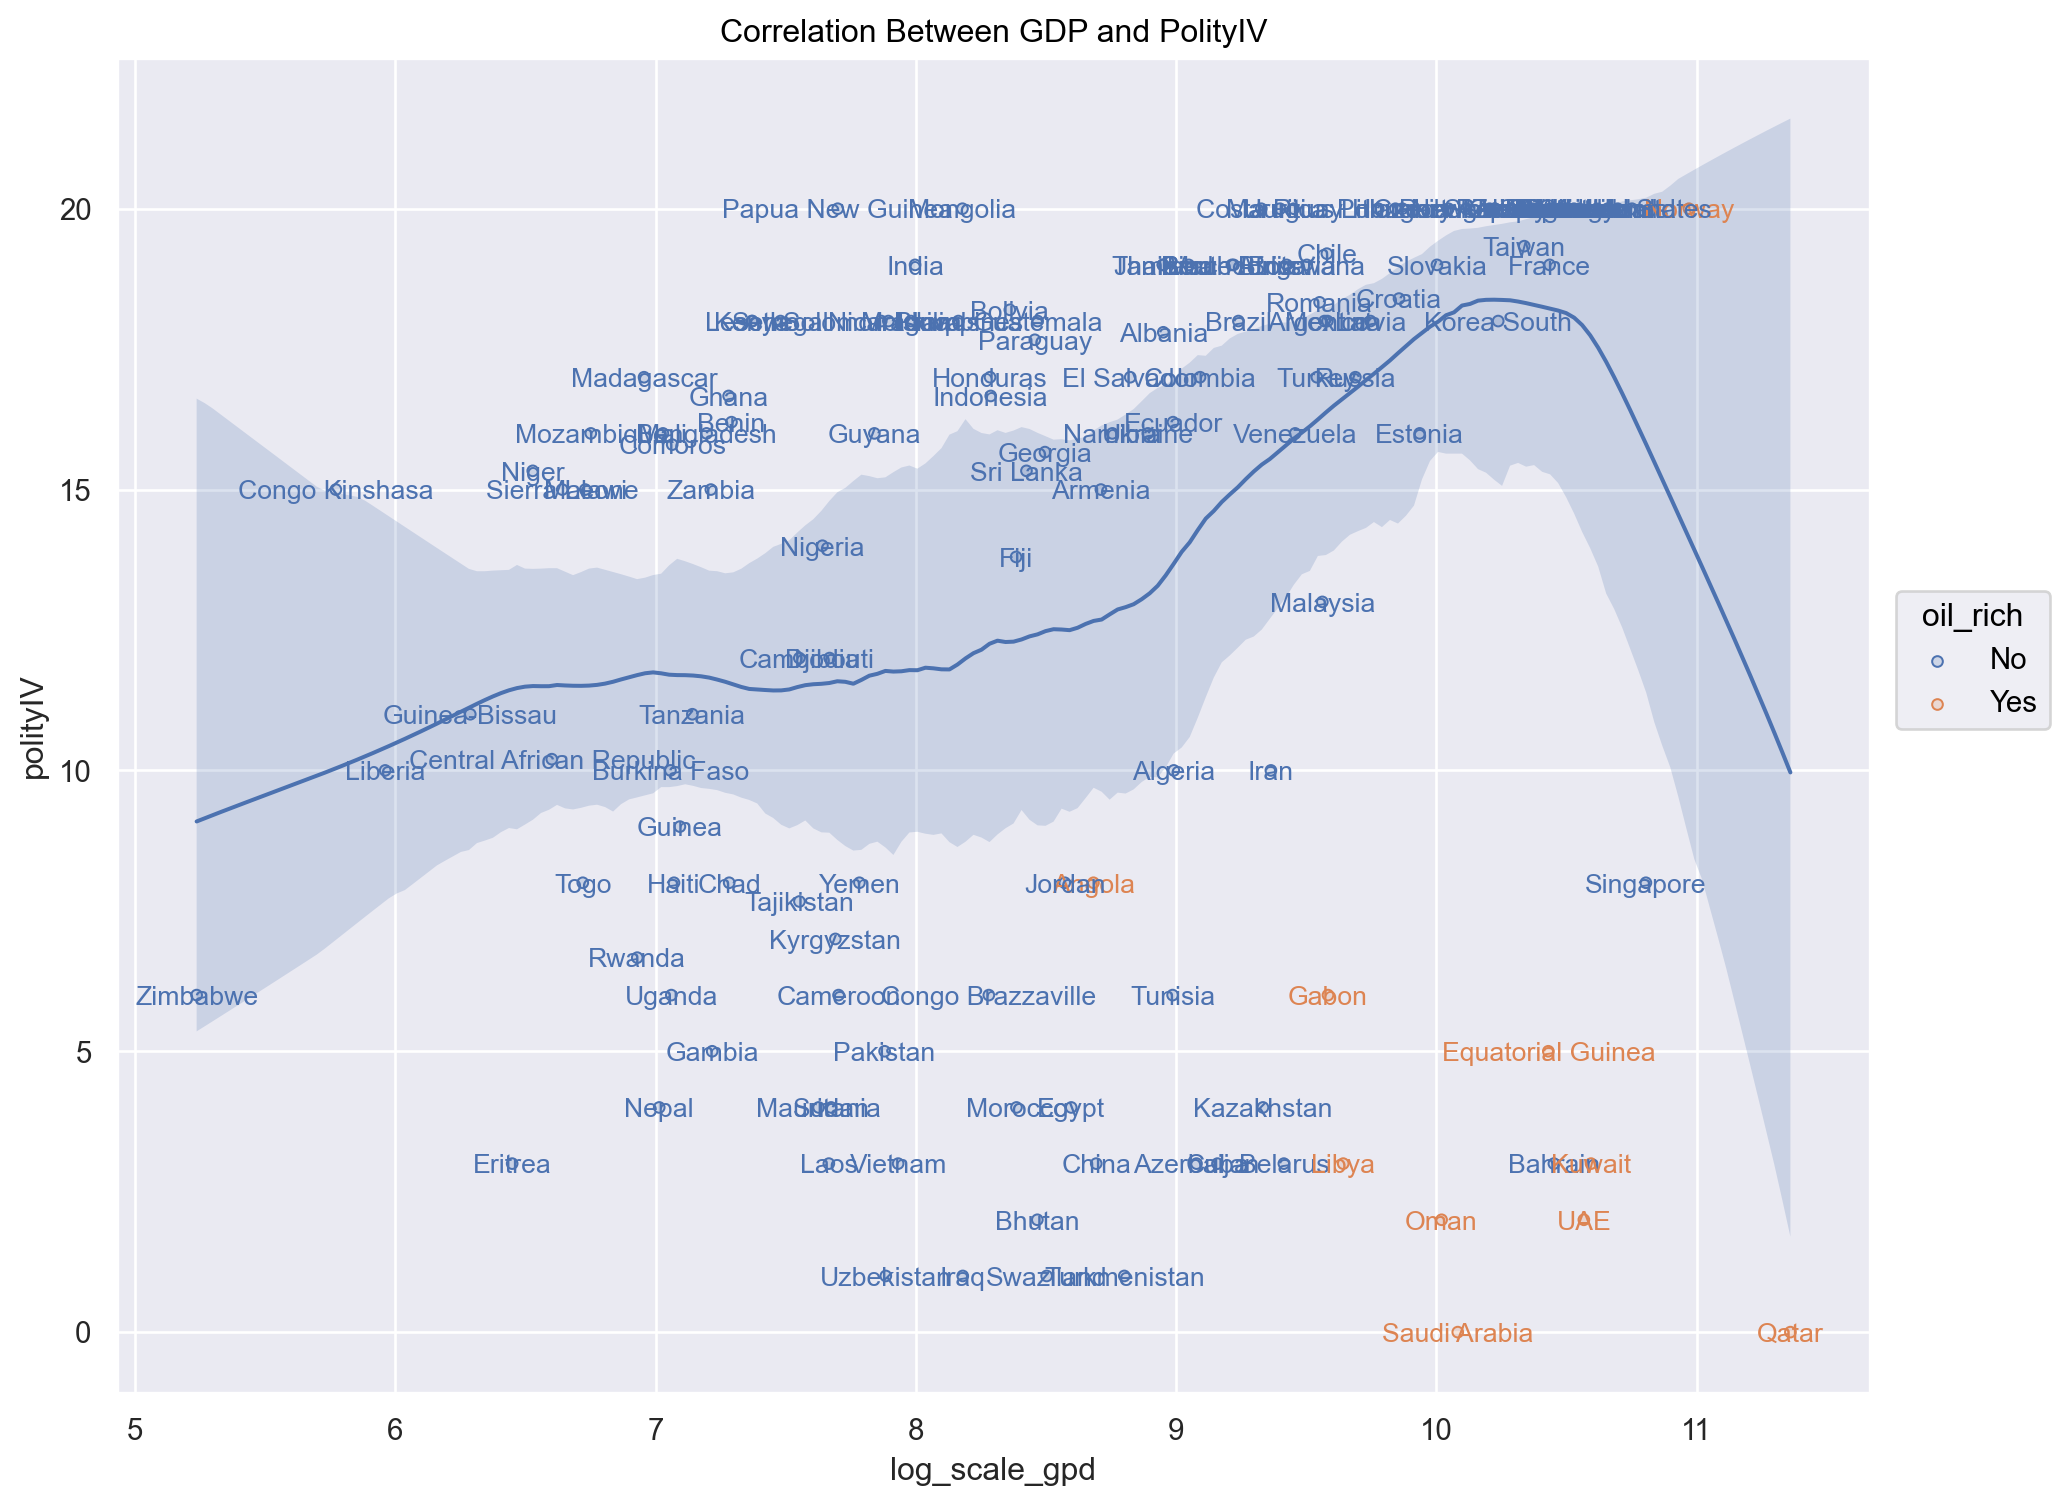

In [26]:
# Write your code here, add another cell if you need to write markdown formate.
wdi["oil_rich"] = "Yes"
wdi.loc[~wdi.country.isin(["Qatar", "Kuwait", "Equatorial Guinea", "UAE", "Norway", "Saudi Arabia", "Libya", "Oman", "Gabon", "Angola"]), "oil_rich"] = "No"

plot = (
    so.Plot(wdi, x="log_scale_gpd", y="polityIV", color="oil_rich").layout(size=(10,8))
                                                    .add(so.Dots())
                                                    .add(so.Line(), lowess := sor.Lowess(frac=0.33, gridsize=200, num_bootstrap=200, alpha=0.95))
                                                    .add(so.Band(), lowess)
                                                    .add(so.Text(fontsize=10), so.Jitter(), text="country")
)
plot.label(title="Correlation Between GDP and PolityIV")

## Take-aways

One of our main jobs as data scientists is to *summarize* data. In fact, its such an obvious part of our jobs we often don't think about it very much. In reality, however, this is one of the most difficult things we do. 

Summarization means taking rich, complex data and trying to tell readers about what is going on in that data using simple statistics. In the process of summarization, therefore, we must necessarily throw away much of the richness of the original data. When done well, this simplification makes data easier to understand, but only if we throw away the *right* data. You can *always* calulate the average value of a variable, or fit a linear model, but whether doing so generates a summary statistic that properly represents the essence of the data being studied depends on the data itself. 

Plotting is one fo the best tools we have as data scientists for evaluating whether we are throwing away the *right* data. As we learned from Part 1 of this exercise, just looking at means and standard deviations can mask tremendous variation. Each of our example datasets looked the same when we examined our summary statistics, but they were all radically different when plotted. 

Similarly, a simple linear model would "tell" us that if GDP per capita increases by \$10,000, we would expect Polity scores to increase by about 1 (i.e. the coefficent on the linear model was 9.602e-05). But when we plot the data, not only can we that the data is definitely *not* linear (and so that slope doesn't really mean anything), but we can also see that oil producing countries seem to defy the overall trend, and so should maybe be studied separately. 

Moreover, we can see that if we just look at oil producers, there is no clear story: some are rich and democratic, while others are rich and autocratic (indeed, [this observation is the foundation of some great research on the political consequences of resource wealth](https://www.jstor.org/stable/41480824)!)

So remember this: tools for summarizing data will always give you an answer, but it's up to you as a data scientist to make sure that the summaries you pass on to other people properly represent the data you're using. And there is perhaps no better way to do this than with plotting!

## Extra Question: Overlaying Data Series with matplotlib (You may ignore this question if you are not interested in it, this will not affect your grade.)

Sometimes, it is useful to make a paired plot in which different data series were plotted next to one another with a shared x-axis. Presumably that we work on a economic data and resulted in a figure that looked something like this:

Often times, however, it's more interesting to directly overlay data series on the same plot to make a figure like this:

![two series sample plot](two_series_overlayed.png)


So let's do that here!

### Extra question on plotting

Making this work will require two new tricks: 

- using the `.twinx()` method from matplotlib, and 
- using the `.on()` method from seaborn.objects.

How? Great question! I'm going to leave it to you to figure that out using the documentation for these methods. But here's a start — you can find the `.on()` [method for seaborn.objects here](https://seaborn.pydata.org/generated/seaborn.objects.Plot.on.html), and the `.twinx()` for matplotlib [method demonstrated here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py)


Good luck! 

Also, if you want to, feel free to add any extra bells and whistles as part of your exploration (like a legend, or colored y-axis labels).

In [27]:
# Write your code here, add another cell if you need to write markdown formate.